In [1]:
import sys, os
clones_path = os.path.abspath('..')
if clones_path not in sys.path:
    sys.path.insert(0, clones_path)
    
import numpy as np
import matplotlib.pyplot as plt
from growth.sweep.sweep import Sweep
from clones.annotation.validation.benchmark import Benchmark

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
sweep_path = '../../growth/simulations/Sweep_181121_235632/'
sweep = Sweep.load(sweep_path)

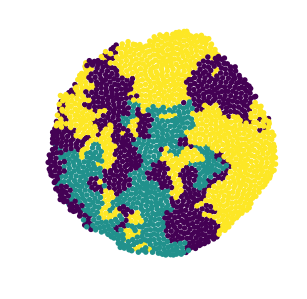

In [3]:
simulation_id = 430
simulation = sweep[simulation_id]
simulation.plot()

In [5]:
simulation.reference_population

AttributeError: 'GrowthSimulation' object has no attribute 'reference_population'

In [91]:
scale = 2

# measure culture
measurements = simulation.measure(scale=scale)

# perform benchmark annotation
max_length = 0.02 * simulation.circumference
benchmark = Benchmark(measurements, rule='weighted', max_length=max_length, twolevel=False)

# print results
simple_score = benchmark.scores['simple']
community_score = benchmark.scores['community']
print('SIMPLE MAE {:0.3f}'.format(simple_score.MAE))
print('COMMUNITY MAE {:0.3f}'.format(community_score.MAE))

SIMPLE MAE 0.480
COMMUNITY MAE 0.482


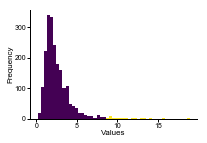

In [92]:
benchmark.cell_classifier.show()

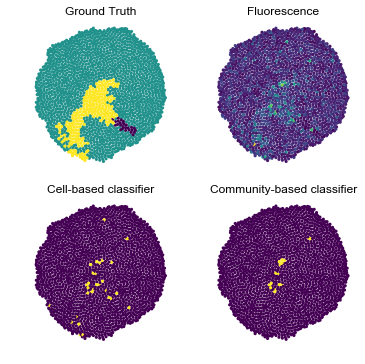

In [93]:
benchmark.show()

In [ ]:
# train on multiple discs
# merge clusters

In [18]:
sweep.N

640

In [34]:
sweep.N

640

In [24]:
recombination_start, recombination_rate = sweep.grid

In [43]:
x = sweep.parameters.reshape((*sweep.grid[0].shape, sweep.batch_size, 2))

In [46]:
sweep.batch_size

10

In [49]:
indices = np.arange(sweep.N).reshape(-1, sweep.batch_size)

In [103]:
indices

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9],
       [ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19],
       [ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29],
       [ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39],
       [ 40,  41,  42,  43,  44,  45,  46,  47,  48,  49],
       [ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59],
       [ 60,  61,  62,  63,  64,  65,  66,  67,  68,  69],
       [ 70,  71,  72,  73,  74,  75,  76,  77,  78,  79],
       [ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89],
       [ 90,  91,  92,  93,  94,  95,  96,  97,  98,  99],
       [100, 101, 102, 103, 104, 105, 106, 107, 108, 109],
       [110, 111, 112, 113, 114, 115, 116, 117, 118, 119],
       [120, 121, 122, 123, 124, 125, 126, 127, 128, 129],
       [130, 131, 132, 133, 134, 135, 136, 137, 138, 139],
       [140, 141, 142, 143, 144, 145, 146, 147, 148, 149],
       [150, 151, 152, 153, 154, 155, 156, 157, 158, 159],
       [160, 161, 162, 163, 164, 165, 166, 167, 168, 169

In [96]:
batch_id = 43
simulations = [sweep[i] for i in indices[batch_id]]

In [97]:
import pandas as pd

scale = 5
pts = pd.concat([sim.measure(scale=scale) for sim in simulations])

In [98]:
classify_on = 'r'
classifier = BayesianClassifier(pts[classify_on].values, classify_on='r')

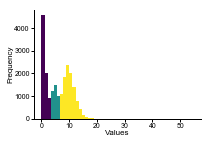

In [99]:
classifier.show()

In [102]:
simulation.size / simulation.reference_population

2095

In [66]:
from clones.annotation.bayesian import BayesianClassifier

In [ ]:
"""
1. write method to aggregate batches
2. train cell classifier on whole batch
3. try merging clusters that improve posterior likelihood
4. run scoring on all simulations

"""

In [62]:
for sim in simulations:
    sim.measure

In [5]:
edges = benchmark.annotator.graph.build_links()

In [6]:
import infomap

In [7]:
# instantiate infomap
infomap_obj = infomap.Infomap("--undirected")
network = infomap_obj.network()

# add edges
_ = [network.addLink(*e) for e in edges]

# run
infomap_obj.run()

In [12]:
for module in infomap_obj.iterModules():
    if module.isLeafModule():
        print(module.path())
    else:
        x = module.
        print(x.)

<Swig Object of type 'infomap::InfoNode::edge_iterator_wrapper *' at 0x104eb0330>
<Swig Object of type 'infomap::InfoNode::edge_iterator_wrapper *' at 0x104eb0c00>
<Swig Object of type 'infomap::InfoNode::edge_iterator_wrapper *' at 0x104eb0180>
<Swig Object of type 'infomap::InfoNode::edge_iterator_wrapper *' at 0x104eb0750>
(0, 0, 0, 0)
(0, 0, 0, 1)
(0, 0, 0, 2)
(0, 0, 0, 3)
(0, 0, 0, 4)
(0, 0, 0, 5)
(0, 0, 0, 6)
(0, 0, 0, 7)
(0, 0, 0, 8)
<Swig Object of type 'infomap::InfoNode::edge_iterator_wrapper *' at 0x104eb0510>
(0, 0, 1, 0)
(0, 0, 1, 1)
(0, 0, 1, 2)
(0, 0, 1, 3)
(0, 0, 1, 4)
(0, 0, 1, 5)
(0, 0, 1, 6)
(0, 0, 2)
<Swig Object of type 'infomap::InfoNode::edge_iterator_wrapper *' at 0x104eb0d80>
(0, 1, 0)
(0, 1, 1)
(0, 1, 2)
(0, 1, 3)
(0, 1, 4)
(0, 1, 5)
(0, 1, 6)
(0, 1, 7)
(0, 1, 8)
(0, 1, 9)
<Swig Object of type 'infomap::InfoNode::edge_iterator_wrapper *' at 0x104eb0060>
<Swig Object of type 'infomap::InfoNode::edge_iterator_wrapper *' at 0x104eb0d20>
(0, 2, 0, 0)
(0, 2, 0, 1)


In [38]:
import networkx as nx

In [39]:
# can write recursive merger - greedily merge modules if it iproves fit

In [42]:

G = nx.Graph()
G.add_edges_from(simulation.triangulation.edges)

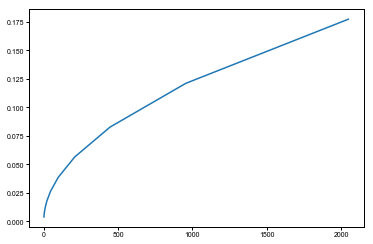

In [35]:
f = 0.05

fig, ax = plt.subplots()
x = np.logspace(0, 11, 11, base=2)
ax.plot(x, [f*circumference(x_) for x_ in x])


In [149]:
from clones.spatial.graphs_new import WeightedGraph

In [150]:
g = WeightedGraph(benchmark.df, max_length=0.05, weighted_by='r')

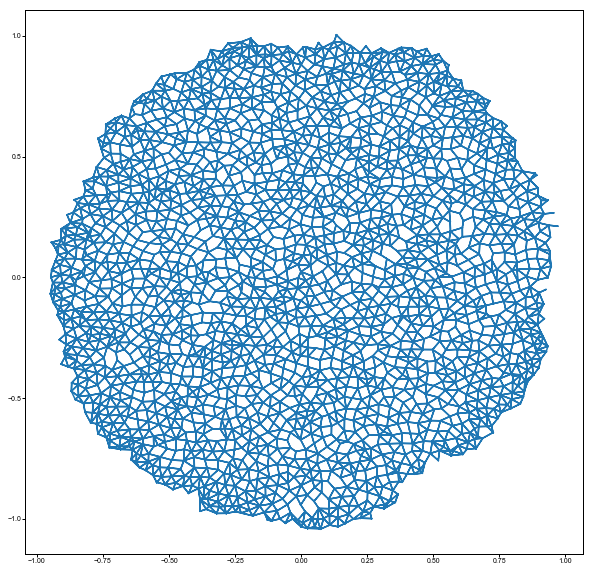

In [151]:
fig, ax = plt.subplots(figsize=(10, 10))
g.plot_edges(ax=ax)

In [83]:
g.find_communities()

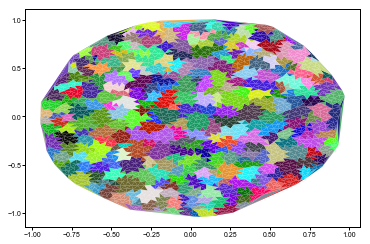

In [94]:
colors = np.random.random(size=(g.nodes.size, 4))

cmap = ListedColormap(colors)

g.plot_triangles(label_by='community', cmap=cmap)

In [85]:
g.community_labels

array([  0,   0,   0, ..., 235, 236, 236])

In [6]:
from clones.annotation.validation.batch import Batch

In [50]:
batch_id = 25
batch = Batch(sweep.batches[batch_id])

In [51]:
data = batch.measure(scale=4, replicates=10)

In [52]:
from clones.annotation.bayesian import BayesianClassifier

In [53]:
classifier = BayesianClassifier(data.r.values, classify_on='r')

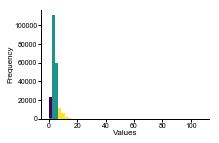

In [54]:
classifier.show()

In [55]:
results = {}
for replicate_id, replicate in data.groupby(['growth_replicate', 'fluorescence_replicate']):
    benchmark = Benchmark(replicate, classifier=classifier, rule='weighted', twolevel=True)
    results[replicate_id] = [benchmark.simple_MAE, benchmark.community_MAE]

/Users/Sebi/Documents/grad_school/research/clones_dev/clones/annotation/validation/benchmark.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  measurements['simple_genotype'] = classifier(measurements)
/Users/Sebi/Documents/grad_school/research/clones_dev/clones/annotation/genotype.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.graph.df['community'] = -1
/Users/Sebi/.virtualenvs/clones/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [27]:
# perform benchmark annotation
benchmark = Benchmark(replicate, classifier=classifier, rule='weighted', twolevel=False)

# print results
print('SIMPLE MAE {:0.3f}'.format(benchmark.simple_MAE))
print('COMMUNITY MAE {:0.3f}'.format(benchmark.community_MAE))

SIMPLE MAE 0.099
COMMUNITY MAE 0.077


In [87]:
benchmark.scores

{'simple': <clones.annotation.validation.scoring.Scoring at 0x11c823ac8>,
 'community': <clones.annotation.validation.scoring.Scoring at 0x11c889780>}

In [56]:
simple, community = np.vstack(list(results.values())).T

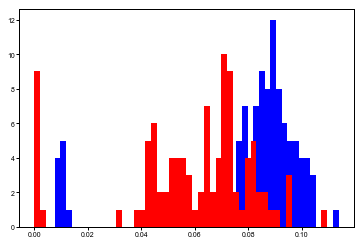

In [57]:
fig, ax = plt.subplots()
_ = ax.hist(simple, bins=50, color='b')
_ = ax.hist(community, bins=50, color='r')

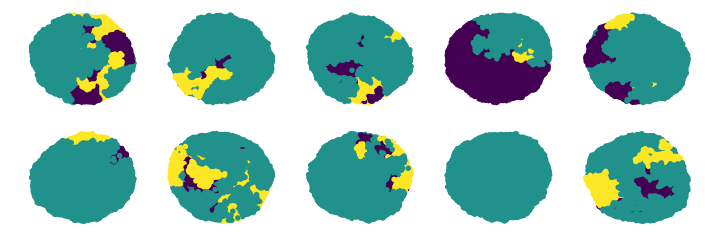

In [58]:
ncols = 5
nrows = batch.size // ncols
if batch.size % ncols != 0:
    nrows += 1
    
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 2*nrows))

for i, sim in enumerate(batch):
    ax = axes.ravel()[i]
    sim.plot(ax=ax)
    ax.axis('off')

In [42]:
for sim in batch:
    sim

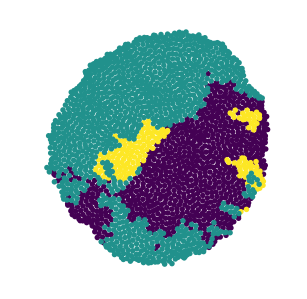

In [44]:
sim.plot()